In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from model.gnn_recommender import GNNRecommender

import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = torch.load('output/graph_data.pt')

In [3]:
def train(model, optimizer, criterion, data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.train_edge_index, data.train_edge_attr)
    loss = torch.sqrt(criterion(out[data.train_edge_index].squeeze(), data.train_edge_attr))
    loss.backward()
    optimizer.step()
    return loss.item()

def validate(model, criterion, data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.val_edge_index, data.val_edge_attr)
        loss = torch.sqrt(criterion(out[data.val_edge_index].squeeze(), data.val_edge_attr))
    return loss.item()

def test(model, criterion, data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.test_edge_index, data.test_edge_attr)
        loss = torch.sqrt(criterion(out[data.test_edge_index].squeeze(), data.test_edge_attr))
    return loss.item()

In [4]:
def learn(model, optimizer, criterion, data, n_epochs):
    train_loss_history = []
    val_loss_history = []
    for epoch in range(n_epochs):
        train_loss = train(model, optimizer, criterion, data)
        val_loss = validate(model, criterion, data)
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)
        print(f'Epoch {epoch+1}, Train Loss: {train_loss}, Val Loss: {val_loss}')
    return train_loss_history, val_loss_history

In [5]:
def plot_loss(train_loss_history, val_loss_history):
    plt.figure(figsize=(8,4))
    plt.plot(np.arange(1, len(train_loss_history) + 1), train_loss_history, label='Training loss', c='blue')
    plt.plot(np.arange(1, len(val_loss_history) + 1), val_loss_history, label='Validation loss', c='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('GNN')
    plt.legend(loc='upper right', fontsize='x-large')
    plt.show()

In [6]:
model1 = GNNRecommender(input_dim=data.x.shape[1], hidden_dim=16, output_dim=1)
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)
criterion1 = torch.nn.MSELoss()

train_loss_history, val_loss_history = learn(model1, optimizer1, criterion1, data, n_epochs=600)

Epoch 1, Train Loss: 3.493717670440674, Val Loss: 2.9962456226348877
Epoch 2, Train Loss: 3.09228253364563, Val Loss: 2.552791118621826
Epoch 3, Train Loss: 2.7195866107940674, Val Loss: 2.27422833442688
Epoch 4, Train Loss: 2.2890725135803223, Val Loss: 2.229462146759033
Epoch 5, Train Loss: 2.1366069316864014, Val Loss: 2.4239373207092285
Epoch 6, Train Loss: 1.8139523267745972, Val Loss: 2.780302047729492
Epoch 7, Train Loss: 1.7437894344329834, Val Loss: 3.183784008026123
Epoch 8, Train Loss: 1.9148505926132202, Val Loss: 3.506049871444702
Epoch 9, Train Loss: 2.2458975315093994, Val Loss: 3.678353786468506
Epoch 10, Train Loss: 1.93655526638031, Val Loss: 3.7414050102233887
Epoch 11, Train Loss: 2.0051162242889404, Val Loss: 3.7081668376922607
Epoch 12, Train Loss: 2.0540037155151367, Val Loss: 3.6006996631622314
Epoch 13, Train Loss: 1.9830950498580933, Val Loss: 3.4393959045410156
Epoch 14, Train Loss: 1.970996618270874, Val Loss: 3.2382686138153076
Epoch 15, Train Loss: 1.79867

In [7]:
test_loss = test(model1, criterion1, data)
print(f'Test Loss: {test_loss}')

Test Loss: 1.2167868614196777


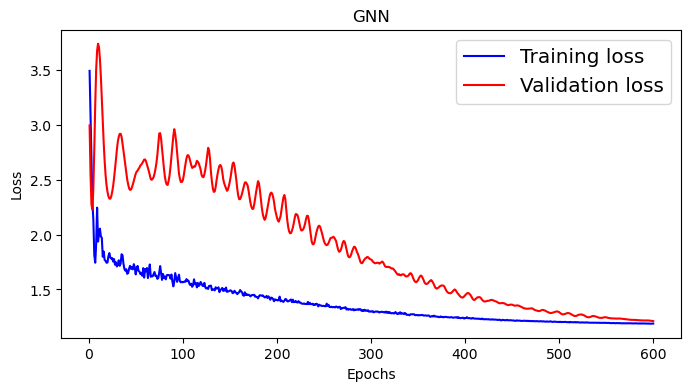

In [8]:
plot_loss(train_loss_history, val_loss_history)

In [9]:
model2 = GNNRecommender(input_dim=data.x.shape[1], hidden_dim=8, output_dim=1)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.03)
criterion2 = torch.nn.MSELoss()

train_loss_history, val_loss_history = learn(model2, optimizer2, criterion2, data, n_epochs=200)

Epoch 1, Train Loss: 2.206883668899536, Val Loss: 2.371941328048706
Epoch 2, Train Loss: 1.9374003410339355, Val Loss: 2.7953598499298096
Epoch 3, Train Loss: 1.905712366104126, Val Loss: 3.0921621322631836
Epoch 4, Train Loss: 1.7578049898147583, Val Loss: 3.1840009689331055
Epoch 5, Train Loss: 1.8128769397735596, Val Loss: 3.1058096885681152
Epoch 6, Train Loss: 1.7763640880584717, Val Loss: 2.964120388031006
Epoch 7, Train Loss: 1.7514551877975464, Val Loss: 2.7452232837677
Epoch 8, Train Loss: 1.7653909921646118, Val Loss: 2.5553858280181885
Epoch 9, Train Loss: 1.7652369737625122, Val Loss: 2.4578733444213867
Epoch 10, Train Loss: 1.724930763244629, Val Loss: 2.424889326095581
Epoch 11, Train Loss: 1.783542513847351, Val Loss: 2.4178342819213867
Epoch 12, Train Loss: 1.759446620941162, Val Loss: 2.4495105743408203
Epoch 13, Train Loss: 1.7122509479522705, Val Loss: 2.517986536026001
Epoch 14, Train Loss: 1.6802480220794678, Val Loss: 2.633570909500122
Epoch 15, Train Loss: 1.7348

In [10]:
test_loss = test(model2, criterion2, data)
print(f'Test Loss: {test_loss}')

Test Loss: 1.1894803047180176


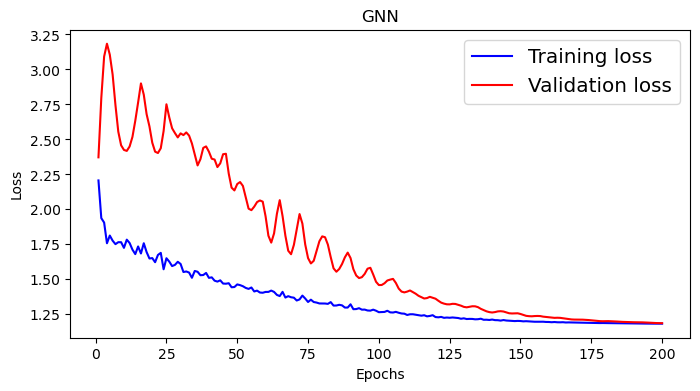

In [11]:
plot_loss(train_loss_history, val_loss_history)

In [12]:
model3 = GNNRecommender(input_dim=data.x.shape[1], hidden_dim=8, output_dim=1)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.1)
criterion3 = torch.nn.MSELoss()

train_loss_history, val_loss_history = learn(model3, optimizer3, criterion3, data, n_epochs=100)

Epoch 1, Train Loss: 4.770547389984131, Val Loss: 3.237982988357544
Epoch 2, Train Loss: 3.5402209758758545, Val Loss: 2.340008497238159
Epoch 3, Train Loss: 2.3939216136932373, Val Loss: 4.428974628448486
Epoch 4, Train Loss: 1.8900145292282104, Val Loss: 4.743778705596924
Epoch 5, Train Loss: 2.1460278034210205, Val Loss: 3.511456251144409
Epoch 6, Train Loss: 1.7303980588912964, Val Loss: 2.758944272994995
Epoch 7, Train Loss: 1.7845168113708496, Val Loss: 2.4976892471313477
Epoch 8, Train Loss: 1.8584662675857544, Val Loss: 2.487011194229126
Epoch 9, Train Loss: 1.7602827548980713, Val Loss: 2.6762073040008545
Epoch 10, Train Loss: 1.7356375455856323, Val Loss: 2.9524242877960205
Epoch 11, Train Loss: 1.6308318376541138, Val Loss: 3.1223113536834717
Epoch 12, Train Loss: 1.7659662961959839, Val Loss: 2.9212749004364014
Epoch 13, Train Loss: 1.6848794221878052, Val Loss: 2.5886387825012207
Epoch 14, Train Loss: 1.6263599395751953, Val Loss: 2.283038854598999
Epoch 15, Train Loss: 1.

In [13]:
test_loss = test(model3, criterion3, data)
print(f'Test Loss: {test_loss}')

Test Loss: 1.1802846193313599


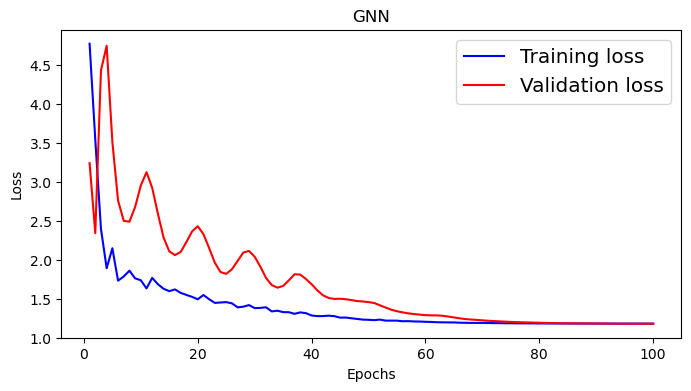

In [14]:
plot_loss(train_loss_history, val_loss_history)

In [15]:
model_path = 'output/gnn_recommender.pth'
torch.save(model3.state_dict(), model_path)